In [8]:
function Euler(f,y0,t0,tn,p)
    
#f funcion
#Y0,T0 condiciones iniciales 
#Tn fin del intervalo 
#p número de pasos 

yk=y0
tk=t0
delta=(tn-t0)/p

A = zeros(Float64,p+1,2)
    
for i in 0:p
        
        A[i+1,1] = tk
        A[i+1,2] = yk
        yk = yk + f(tk,yk)*delta
        tk = tk + delta
end
return A
end

Euler (generic function with 1 method)

In [3]:
function RK(f,y0,t0,tn,p)

#f funcion
#Y0,T0 condiciones iniciales 
#Tn fin del intervalo 
#p número de pasos 

yk=y0 
tk=t0
delta=(tn-t0)/p
       
A = zeros(Float64,p+1,2)

for i in 0:p   
       
        A[i+1,1]=tk 
        A[i+1,2]=yk 
        k1 = f(tk,yk) 
        tmid = tk + delta/2 
        k2 = f(tmid,yk+k1*delta/2) 
        k3 = f(tmid,yk+k2*delta/2) 
        tk = tk+delta 
        k4 = f(tk,yk + k3*delta) 
        yk = yk + (k1+2*k2+2*k3+k4)*delta/6 
 
end

return A 
end

RK (generic function with 1 method)

[0.0 0.5; 1.0 0.875; 2.0 0.998046875; 3.0 0.9999999925494194; 4.0 1.0; 5.0 1.0; 6.0 1.0; 7.0 1.0; 8.0 1.0; 9.0 1.0; 10.0 1.0]


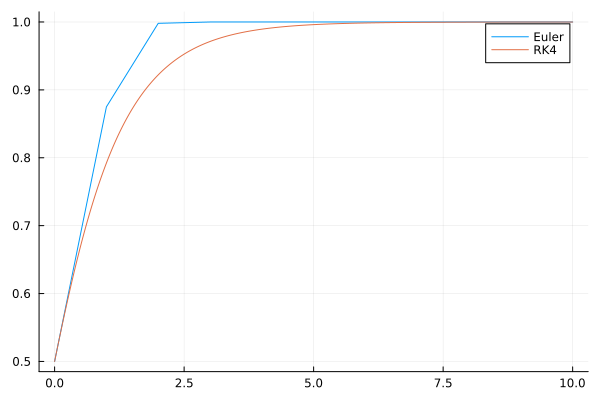

In [16]:
using Plots

f(t,y)=y*(1-y)*(2-y)

A = Euler(f,0.5,0,10,10)
B = RK(f,0.5,0,10,1000)
println(A)
plot(A[:,1],A[:,2], label="Euler")
plot!(B[:,1],B[:,2], label="RK4")

In [74]:
function RKS(F,Y0,t0,tn,p)

Yk=Y0    
tk=t0
delta=(tn-t0)/p
    
A = zeros(Float64,p+1,length(Y0)+1)

i=0

for i in 0:p   
        
        A[i+1,1] = tk
        
        for j in 2:length(Y0)+1
                A[i+1,j]=Yk[j-1]            
        end
        
        K1 = F(tk,Yk)
        tmid = tk + delta/2
        K2 = F(tmid,Yk+(K1.*(delta/2)))
        K3 = F(tmid,Yk+(K2.*(delta/2)))
        tk = tk+delta 
        K4 = F(tk,Yk + K3.*delta)
        K  = (K1+(K2.*2)+(K3.*2)+K4)./6
        Yk = Yk + (K.*delta)      

end
    
return A
end

RKS (generic function with 1 method)

In [7]:
f(t,x,y)=2*x-1.2*x*y
g(t,x,y)=-y+1.2*x*y

Y0 = [1,1]

M(t,Y) = [f(t,Y[1],Y[2]),g(t,Y[1],Y[2])]

C = RKS(M,Y0,0,8,80)

LoadError: UndefVarError: RKS not defined

In [5]:
plot(C[:,1] ,[C[:,2],C[:,3]])

LoadError: UndefVarError: C not defined

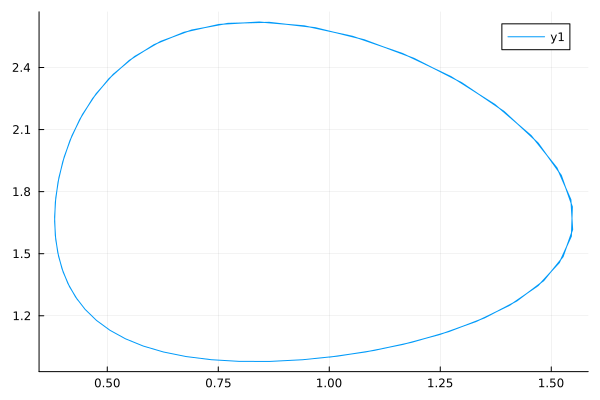

In [97]:
plot(C[:,2],C[:,3])

In [77]:
#Simular pulso (Heaviside)

function pulso(t)
    if(t<0.025) return 0
    elseif(t<0.027) return -20
    else return 0
    end
end

pulso (generic function with 1 method)

In [78]:
#Modelo de Hodgkin y Huxley

vrest=-70     #potencia de descanso
Ena=55        #potencial de equilibrio para sodio
Ek=-82        #potencial de equilibrio para potasio
El=-59        #potencial de equilibrio para cloro y leakage current
gkbar=24.34   
gnabar=70.7   
gl=0.3        #constantes para el modelado de la conductancia
Cm=0.001      #capacitancia de la membrana por centimetro cuadrado

#Coeficientes que dependen de v para cada ion

alphan(v) = 0.01*(10-(v-vrest))/(exp(0.1*(10-(v-vrest)))-1)

betan(v)=0.125*exp(-(v-vrest)/80)

alpham(v)=0.1*(25-(v-vrest))/(exp(0.1*(25-(v-vrest)))-1)

betam(v)=4*exp(-(v-vrest)/18)

alphah(v)=0.07*exp(-0.05*(v-vrest))

betah(v)=1/(exp(0.1*(30-(v-vrest)))+1)

#Sistema de ecuaciones

#dv(t,v,n,m,h)=-(gnabar*m^3*h*(v-Ena)+gkbar*n^4*(v-Ek)+gl*(v-El))/Cm

dv(t,v,n,m,h) = -(gnabar*(m^3)*h*(v - Ena)+gkbar*(n^4)*(v - Ek)+gl*(v - El)+pulso(t))/Cm
dn(t,v,n,m,h) = 1000*(alphan(v)*(1-n)-betan(v)*n)
dm(t,v,n,m,h) = 1000*(alpham(v)*(1-m)-betam(v)*m)
dh(t,v,n,m,h) = 1000*(alphah(v)*(1-h)-betah(v)*h)

#Condicion inicial y setup

Y0=[vrest,0.315,0.042,0.608]

H(t,Y)=[dv(t,Y[1],Y[2],Y[3],Y[4]),dn(t,Y[1],Y[2],Y[3],Y[4]),dm(t,Y[1],Y[2],Y[3],Y[4]),dh(t,Y[1],Y[2],Y[3],Y[4])]

H (generic function with 1 method)

In [79]:
D = RKS(H,Y0,0,0.1,2000)

2001×5 Matrix{Float64}:
 0.0      -70.0     0.315     0.042      0.608
 5.0e-5   -69.9579  0.315027  0.044105   0.607926
 0.0001   -69.914   0.31506   0.0458577  0.607844
 0.00015  -69.8687  0.3151    0.0473281  0.607753
 0.0002   -69.8222  0.315145  0.0485726  0.607653
 0.00025  -69.775   0.315196  0.0496359  0.607544
 0.0003   -69.7272  0.315254  0.050554   0.607426
 0.00035  -69.6791  0.315318  0.0513556  0.607298
 0.0004   -69.6308  0.315388  0.0520635  0.607161
 0.00045  -69.5826  0.315464  0.0526961  0.607015
 0.0005   -69.5345  0.315546  0.0532679  0.60686
 0.00055  -69.4866  0.315635  0.0537906  0.606696
 0.0006   -69.4391  0.315729  0.0542735  0.606522
 ⋮                                       
 0.09945  -68.8659  0.33519   0.0604509  0.555994
 0.0995   -68.8659  0.33519   0.0604509  0.555994
 0.09955  -68.8659  0.33519   0.0604509  0.555994
 0.0996   -68.8659  0.33519   0.0604509  0.555994
 0.09965  -68.8659  0.33519   0.0604509  0.555994
 0.0997   -68.8659  0.33519   0.060450

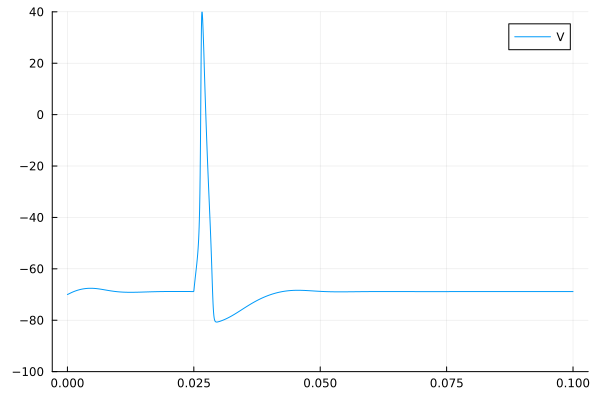

In [87]:
using Plots
plot(D[:,1],D[:,2],label="V",ylims=(-100,40))

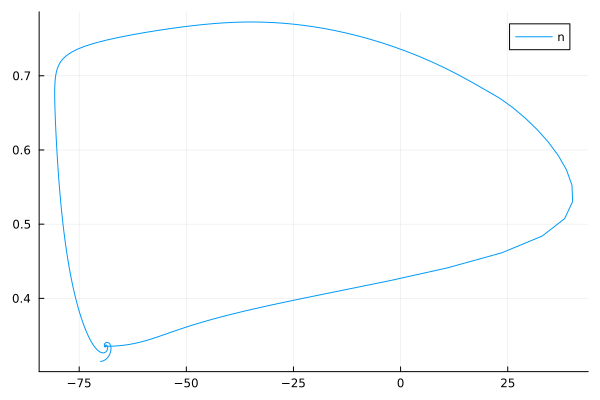

In [81]:
plot(D[:,2],D[:,3],label="n")

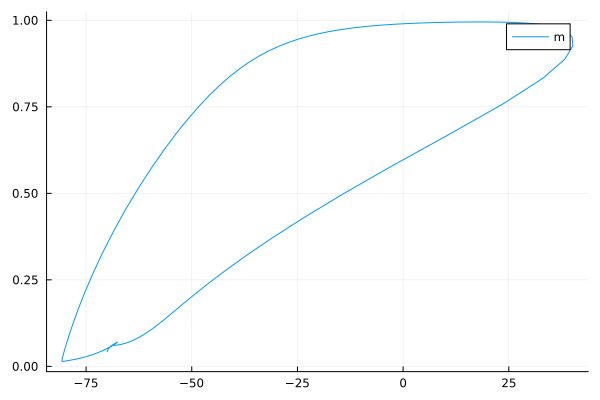

In [82]:
plot(D[:,2],D[:,4],label="m")

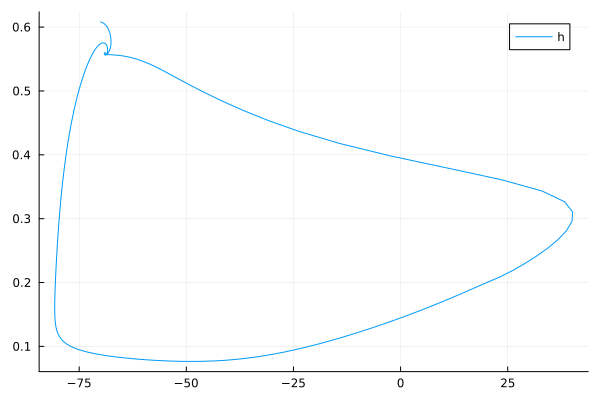

In [83]:
plot(D[:,2],D[:,5],label="h")